In [ ]:
!pip install pyvi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 23.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.5 MB/s eta 0:00:00


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from torch import nn
import torch.nn.functional as F

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import ast

In [ ]:
test_index =  [ 427, 1676, 1383, 2392, 2071,  362, 1006, 1679,  544, 1859, 1725,
       2231, 2728,  332,  696, 2552, 1910,  824, 1423,  413,  975, 2096,
        549, 1233,  841, 2859, 2453, 2874,  550, 1896,  874, 1740, 2280,
        775, 1587,  793,  143, 2876, 1261, 2695, 1805, 1461, 2944, 1164,
        984,  849, 1634, 2708, 1878,  395,  510,  445, 2655,  965, 2946,
        832, 2219, 2198, 1140, 1486, 2909,  443,  620,  302, 2477, 1496,
       2566, 1621,  561, 1593, 1635, 2308, 2706, 1094,  199, 2916, 2524,
       2438, 1566,  599, 2353,  967,  796, 1835, 1337, 1963, 1817, 2836,
         32, 2482,   67, 2217, 1545, 1287, 1647, 2831, 1842, 2042,  304,
       2434,  980,  872, 1075,  326, 1494, 2298, 2568, 2619, 2448, 1471,
        316, 2683,  513, 2051, 1179, 2960, 2032, 2764,  201, 1352, 2366,
        897, 1907,  663,   30,  452, 1073, 2809,  585, 1660, 1331, 1639,
        182,  894, 1611, 1820, 2500, 2969, 2534, 1881, 2522, 2344,   73,
       1257,   63, 1701,  216,   45, 1452, 2301, 1230, 1518,   80, 2601,
       2844, 1153, 1021,  494, 2557, 1474, 1442,  420, 1681, 2651, 1533,
        713, 2799, 1557, 2243, 2362, 2903,  617, 1711, 1252, 1370,  628,
         44, 1469,  473, 1546, 2758, 2271,  446, 2875, 2865,  339,  423,
         93, 1536,  179,  801,  449, 1543, 1517,  470, 1421,  581,  862,
        534,  590, 2476, 2413,  522,  376, 2447, 2518,  244, 2412, 2886,
        463, 1892, 1777, 2107, 1816, 2416, 2327, 1246, 1234, 2797,  476,
        612,  560,  422,   70,  915, 2689,  501, 1145,   56, 1247, 1673,
       2098, 2869, 1491,  329,  102,  404, 2466, 1108,  500, 2664, 1814,
       2127, 1363, 2631, 2321, 2307,  126,  432, 2041,  545,  616, 1083,
       1935,  681, 2106,  750, 2160, 1666, 2444, 1137, 1736, 2281, 1703,
       1417, 2850,  238, 2312, 1825, 2840, 1136, 1318,  525, 1932,  904,
       1705, 2275, 1131, 2471, 1204, 2295, 2025, 2861, 1299, 1147, 2819,
       2250, 1291,   29, 2621,  880, 1268, 1090, 1631, 1784,  193,  173,
       1824,   43,   87, 2672,  865,  288, 2816, 2796,  661, 1005, 1283,
       2635, 2446,  151,  538, 1525]
print(min(test_index))
test_index.sort()

29


In [ ]:
data_freq5 = pd.read_csv('/kaggle/input/datafreq/data_5_freq.csv')
data_freq5

,id,text,view,vote,chapter,1,2,3,4,5,6,7,8
0,0.0,vampir sói 12 chòm sống tình_cảm 12 chòm câu k...,69463.0,3355.0,32.0,False,True,True,False,False,False,False,False
1,1.0,nữ tác hoạ cốt kỷ 21 nàng nổi_tiếng giới xuyên...,3529078.0,128419.0,160.0,False,True,False,False,False,False,False,False
2,2.0,share sở,87261.0,2780.0,13.0,False,True,False,False,False,False,False,False
3,3.0,tình_yêu giết góc gái hoàn_thành câu chữ chút ...,34795.0,2049.0,17.0,True,True,False,False,False,False,False,False
4,4.0,hán_việt tuyệt_vọng giáo thất vong kỳ ly vốn t...,25746.0,1068.0,NaN,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,2970.0,phong đỏ chia lặng gió phong written,1090.0,150.0,NaN,False,False,False,True,False,False,False,False
2886,2971.0,lee x home mệt_mỏi nhẹ_nhàng ôm bao mệt_mỏi ta...,452.0,64.0,5.0,True,False,False,True,False,False,False,False
2887,2972.0,tình_cờ yêu ooc nguyên_tác coi đường đường vị ...,81.0,4.0,1.0,True,False,False,False,False,False,False,False
2888,2973.0,cute x reader author wattpad fandom thương cou...,NaN,NaN,NaN,False,False,True,False,False,False,False,False


In [ ]:
test_texts = []
test_labels = []
train_texts = []
train_labels = []
for i in range(data_freq5.shape[0]):
    if data_freq5.iloc[i]['id'] in test_index:
        test_texts.append(data_freq5.iloc[i]['text'])
        label = torch.zeros(8)
        for j in range(8):
            label[j] = torch.tensor(data_freq5.iloc[i][str(j + 1)], dtype=torch.float32)
        label = label.view(1, 8)
        test_labels.append(label)
    else:
        train_texts.append(data_freq5.iloc[i]['text'])
        label = torch.zeros(8)
        for j in range(8):
            label[j] = torch.tensor(data_freq5.iloc[i][str(j + 1)], dtype=torch.float32)
        label = label.view(1, 8)
        train_labels.append(label)



print(len(test_texts))
print(len(test_labels))
print(test_labels[0])
print(test_texts[0])
print(len(train_texts))
print(len(train_labels))
print(train_texts[0])
print(train_labels[0])

313
313
tensor([[1., 0., 0., 1., 0., 0., 0., 0.]])
nam cẩm lý hạ tiểu tag hiện_đại vườn_trường sống hàng mai_trúc mã si niên hạ ẩn quỷ công x gia vụ song thụ sinh_tử nhẹ_nhàng tình_cảm h_văn trích_đoạn gan phương khóc cười giọng ngược khuôn_mặt thành đoạn miệng nằm giường nằm giường chại mua đồ ngờ siêu thi trời mưa mưa áo ngắn thấm đành mưa kết quý tác ràng giường gái chân đứng hai hắn chả sợ copi nhầm mục_đích đọc offlin cc ghi_công phi thương_mại tương
2577
2577
vampir sói 12 chòm sống tình_cảm 12 chòm câu kẻ_thù yêu tình kết sói vĩnh_viễn kẻ_thù thử đọc trải_nghiệm tình_yêu góc 12 chòm hội mong ủng_hộ
tensor([[0., 1., 1., 0., 0., 0., 0., 0.]])


In [ ]:
test_labels = torch.cat(test_labels, dim = 0)
train_labels = torch.cat(train_labels, dim = 0)
print(test_labels.shape)
print(train_labels.shape)


torch.Size([313, 8])
torch.Size([2577, 8])


In [ ]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
model =  AutoModelForSequenceClassification.from_pretrained("vinai/phobert-base", num_labels = 8)

config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding="max_length",
            return_attention_mask = True,
            truncation=True,
            return_tensors="pt"
        )

        return {
            "input_ids": inputs["input_ids"].squeeze(),
            "attention_mask": inputs["attention_mask"].squeeze(),
            "labels": torch.tensor(label, dtype=torch.float32)
        }

In [ ]:
trainText, valText, trainLabel, valLabel = train_test_split(train_texts, train_labels, test_size=0.1, random_state=42)
train_dataset = CustomDataset(trainText, trainLabel, tokenizer, max_length=256)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
class FineTuneModel(nn.Module):
    def __init__(self, main_model):
        super(FineTuneModel, self).__init__()
        self.main_model = main_model
        self.sigmoid = nn.Sigmoid()
    def forward(self, input_ids, attention_mask):
        x = self.main_model(input_ids, attention_mask).logits
        x = self.sigmoid(x)
        return x

In [ ]:
loss_fn = torch.nn.BCELoss()
device = torch.device("cuda")

model = model.to(device)

final_model = FineTuneModel(main_model = model).to(device)
optimizer = torch.optim.AdamW(final_model.parameters(), lr=1e-5)

num_epochs = 50
losses = []

final_model.train()
for epoch in range(num_epochs):
    print("epoch ", epoch)
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = final_model(input_ids, attention_mask=attention_mask)

        loss = loss_fn(outputs, labels)
        losses.append(loss.item())
        if len(losses) % 50 == 0:
          print(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


epoch  0


/tmp/ipykernel_34/2660281389.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "labels": torch.tensor(label, dtype=torch.float32)


0.5202378034591675
epoch  1
0.4801429212093353
epoch  2
0.45349282026290894
0.4842955470085144
epoch  3
0.4449939727783203
epoch  4
0.4529469609260559
0.4893333613872528
epoch  5
0.4030681848526001
epoch  6
0.4474078416824341
0.48423898220062256
epoch  7
0.41835057735443115
epoch  8
0.368204802274704
0.3682350516319275
epoch  9
0.35967981815338135
epoch  10
0.33091482520103455
0.40100741386413574
epoch  11
0.32372766733169556
epoch  12
0.3432575464248657
epoch  13
0.31147658824920654
0.34231072664260864
epoch  14
0.31947803497314453
epoch  15
0.2899691164493561
0.2705415189266205
epoch  16
0.3212927579879761
epoch  17
0.268253356218338
0.2676997184753418
epoch  18
0.2077227234840393
epoch  19
0.2706347703933716
0.24673184752464294
epoch  20
0.19579219818115234
epoch  21
0.2679416537284851
0.2059452086687088
epoch  22
0.21075651049613953
epoch  23
0.20909377932548523
0.2079925835132599
epoch  24
0.18183717131614685
epoch  25
0.15721829235553741
epoch  26
0.20193946361541748
0.1408975422

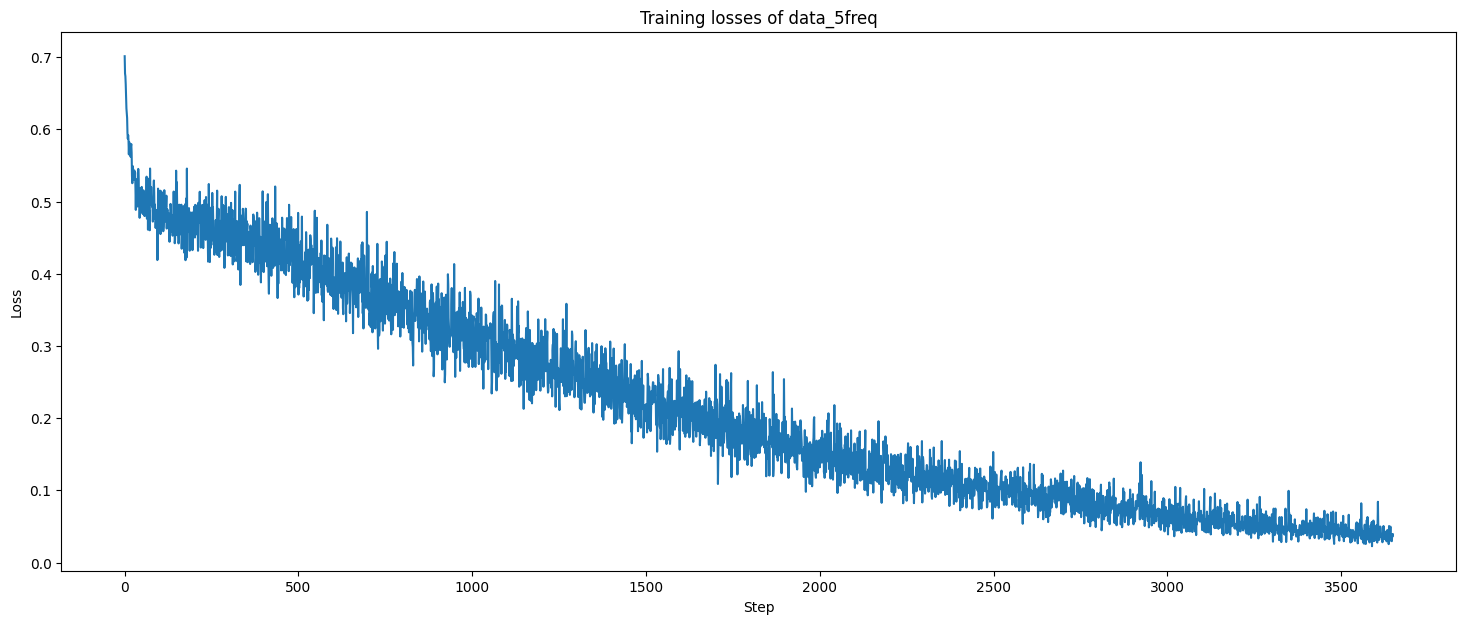

In [ ]:
plt.figure(figsize = (18, 7))
plt.plot(losses)
plt.title("Training losses of data_5freq")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.savefig("/kaggle/working/5loss.png")

In [ ]:
torch.save(final_model.state_dict(), '/kaggle/working/model5.pth')

In [ ]:
data_freq10 = pd.read_csv('/kaggle/input/datafreq/data_10_freq.csv')
data_freq10

,id,text,view,vote,chapter,1,2,3,4,5,6,7,8
0,0.0,vampir sói 12 chòm sống tình_cảm 12 chòm câu k...,69463.0,3355.0,32.0,False,True,True,False,False,False,False,False
1,1.0,nữ tác hoạ cốt kỷ 21 nàng nổi_tiếng giới xuyên...,3529078.0,128419.0,160.0,False,True,False,False,False,False,False,False
2,2.0,share sở,87261.0,2780.0,13.0,False,True,False,False,False,False,False,False
3,3.0,tình_yêu giết góc gái hoàn_thành câu chữ chút ...,34795.0,2049.0,17.0,True,True,False,False,False,False,False,False
4,4.0,hán_việt tuyệt_vọng giáo thất vong kỳ ly vốn t...,25746.0,1068.0,NaN,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,2970.0,phong đỏ chia lặng gió phong written,1090.0,150.0,NaN,False,False,False,True,False,False,False,False
2886,2971.0,lee x home mệt_mỏi nhẹ_nhàng ôm bao mệt_mỏi ta...,452.0,64.0,5.0,True,False,False,True,False,False,False,False
2887,2972.0,tình_cờ yêu ooc nguyên_tác coi đường đường vị ...,81.0,4.0,1.0,True,False,False,False,False,False,False,False
2888,2973.0,cute x reader author wattpad fandom thương cou...,NaN,NaN,NaN,False,False,True,False,False,False,False,False


In [ ]:
test_texts = []
test_labels = []
train_texts = []
train_labels = []
for i in range(data_freq10.shape[0]):
    if data_freq10.iloc[i]['id'] in test_index:
        test_texts.append(data_freq10.iloc[i]['text'])
        label = torch.zeros(8)
        for j in range(8):
            label[j] = torch.tensor(data_freq10.iloc[i][str(j + 1)], dtype=torch.float32)
        label = label.view(1, 8)
        test_labels.append(label)
    else:
        train_texts.append(data_freq10.iloc[i]['text'])
        label = torch.zeros(8)
        for j in range(8):
            label[j] = torch.tensor(data_freq10.iloc[i][str(j + 1)], dtype=torch.float32)
        label = label.view(1, 8)
        train_labels.append(label)



print(len(test_texts))
print(len(test_labels))
print(test_labels[0])
print(test_texts[0])
print(len(train_texts))
print(len(train_labels))
print(train_texts[0])
print(train_labels[0])

313
313
tensor([[1., 0., 0., 1., 0., 0., 0., 0.]])
nam cẩm lý hạ tiểu tag hiện_đại vườn_trường sống hàng mai_trúc mã si niên hạ ẩn quỷ công x gia vụ song thụ sinh_tử nhẹ_nhàng tình_cảm h_văn trích_đoạn gan phương khóc cười giọng ngược khuôn_mặt thành đoạn miệng nằm giường nằm giường chại mua đồ ngờ siêu thi trời mưa mưa áo ngắn thấm đành mưa kết quý tác ràng giường gái chân đứng hai hắn chả sợ copi nhầm mục_đích đọc offlin cc ghi_công phi thương_mại tương
2577
2577
vampir sói 12 chòm sống tình_cảm 12 chòm câu kẻ_thù yêu tình kết sói vĩnh_viễn kẻ_thù thử đọc trải_nghiệm tình_yêu góc 12 chòm hội mong ủng_hộ
tensor([[0., 1., 1., 0., 0., 0., 0., 0.]])


In [ ]:
test_labels = torch.cat(test_labels, dim = 0)
train_labels = torch.cat(train_labels, dim = 0)
print(test_labels.shape)
print(train_labels.shape)


torch.Size([313, 8])
torch.Size([2577, 8])


In [ ]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
model =  AutoModelForSequenceClassification.from_pretrained("vinai/phobert-base", num_labels = 8)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
trainText, valText, trainLabel, valLabel = train_test_split(train_texts, train_labels, test_size=0.1, random_state=42)
train_dataset = CustomDataset(trainText, trainLabel, tokenizer, max_length=256)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
loss_fn = torch.nn.BCELoss()
device = torch.device("cuda")

model = model.to(device)

final_model = FineTuneModel(main_model = model).to(device)
optimizer = torch.optim.AdamW(final_model.parameters(), lr=1e-5)

num_epochs = 50
losses = []

final_model.train()
for epoch in range(num_epochs):
    print("epoch ", epoch)
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = final_model(input_ids, attention_mask=attention_mask)

        loss = loss_fn(outputs, labels)
        losses.append(loss.item())
        if len(losses) % 50 == 0:
          print(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


epoch  0


/tmp/ipykernel_34/2660281389.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "labels": torch.tensor(label, dtype=torch.float32)


0.5071283578872681
epoch  1
0.4597853720188141
epoch  2
0.4484131336212158
0.4620891213417053
epoch  3
0.4691622853279114
epoch  4
0.4717898368835449
0.41936030983924866
epoch  5
0.45768028497695923
epoch  6
0.41945546865463257
0.4056662619113922
epoch  7
0.4539949297904968
epoch  8
0.3710212707519531
0.36034566164016724
epoch  9
0.36327487230300903
epoch  10
0.3710280954837799
0.3869718909263611
epoch  11
0.3009522557258606
epoch  12
0.35617831349372864
epoch  13
0.3245867192745209
0.31971389055252075
epoch  14
0.3122921586036682
epoch  15
0.26653093099594116
0.2755430340766907
epoch  16
0.26658275723457336
epoch  17
0.2563762664794922
0.22614789009094238
epoch  18
0.22310484945774078
epoch  19
0.23624828457832336
0.22394785284996033
epoch  20
0.19943629205226898
epoch  21
0.1373392790555954
0.16409321129322052
epoch  22
0.14238682389259338
epoch  23
0.1718340814113617
0.142557755112648
epoch  24
0.15833866596221924
epoch  25
0.15795093774795532
epoch  26
0.14632634818553925
0.1316272

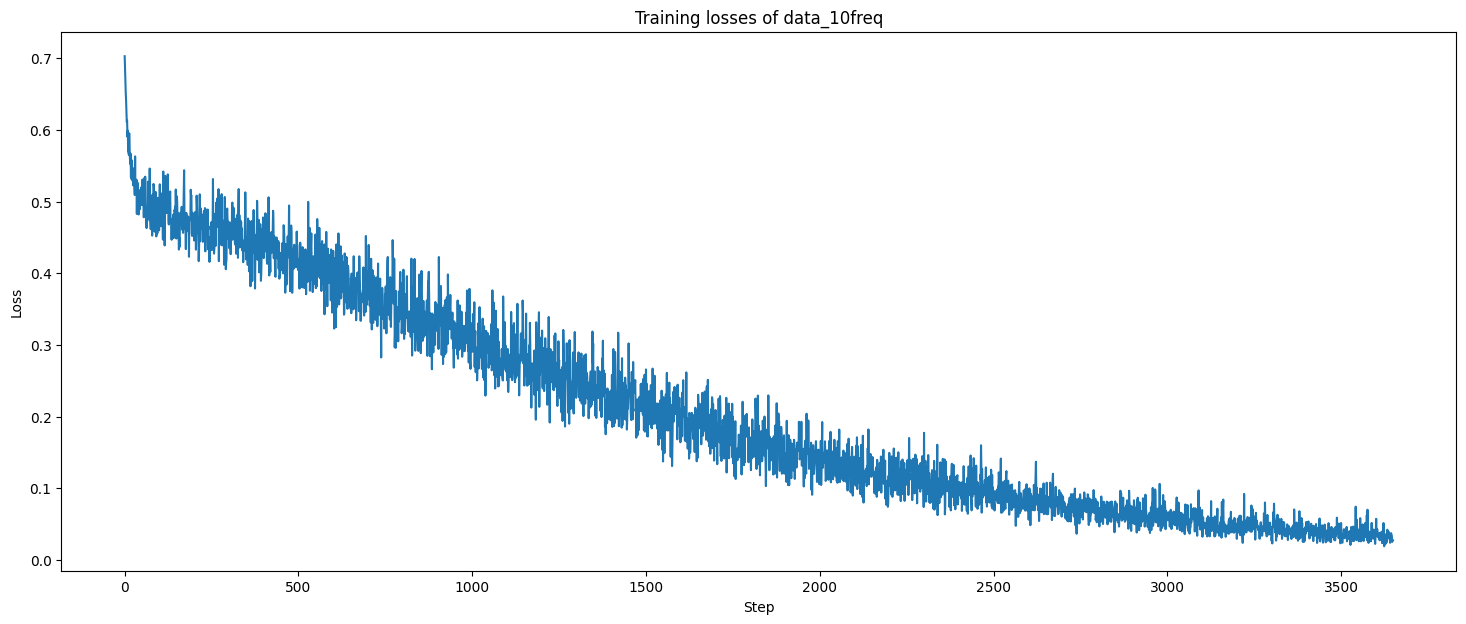

In [ ]:
plt.figure(figsize = (18, 7))
plt.plot(losses)
plt.title("Training losses of data_10freq")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.savefig("/kaggle/working/10loss.png")

In [ ]:
torch.save(final_model.state_dict(), '/kaggle/working/model10.pth')

In [ ]:

text = "tôi yêu em"

token = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=256,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors="pt"
        )


input_ids = token.input_ids.to(device)
attention_mask = token.attention_mask.to(device)

#output

with torch.no_grad():
  final_model.eval()
  output = final_model(input_ids, attention_mask).detach().cpu()

  print(output)